<a href="https://colab.research.google.com/github/HoYoung1/NLPStudy/blob/main/10_%EA%B0%90%EC%A0%95_%EB%B6%84%EC%84%9D(Sentiment_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](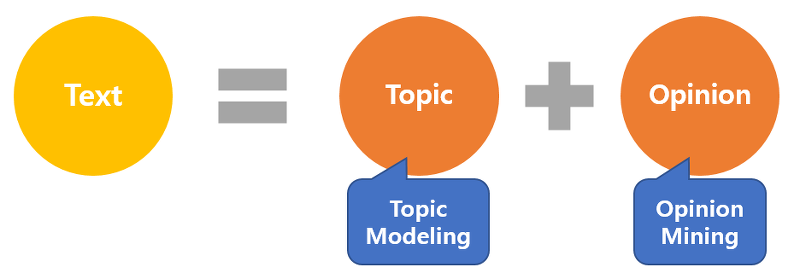)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=906ad3c3083d38c4c75f89c8186d6cbd2d81957a8c19e3c7520b173f7488cc95
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


### 데이터 준비

1.   사용할 데이터를 구성 
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

In [3]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
  print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



([<matplotlib.axis.XTick at 0x7f49b1875b50>,
 [Text(0, 0, 'positive'), Text(0, 0, 'neutral'), Text(0, 0, 'negative')])

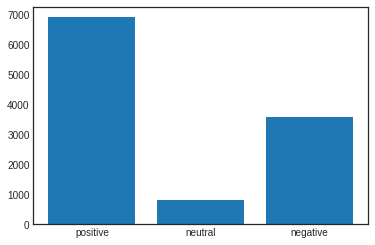

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

positive = 0
neutral = 0
negative = 0 

for i in newsdata.data:
  score = afinn.score(i)
  if score > 0:
    positive += 1
  elif score == 0:
    neutral += 1
  else:
    negative += 1


plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])

## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [5]:
!set x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 448 kB 37.9 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ echo 'Installing automake (A dependency for mecab-ko)'
Installing automake (A dependency for mecab-ko)
+ install_automake
+ '[' Linux == Linux ']'
++ grep -Ei 'debian|buntu|mint' /etc/lsb-release /etc/os-release
+ '[' '/etc/lsb-release:DISTRIB_ID=Ubuntu
/etc/lsb-release:DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
/etc/os-release:NAME="Ubuntu"
/etc/os-release:ID=ubuntu
/etc/

In [6]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [7]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [8]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [9]:
print(train_data.isnull().sum())

train_data = train_data.dropna(how='any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [10]:
train_data['document'] = train_data['document'].str.replace('r[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [11]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id          0
document    0
label       0
dtype: int64


In [12]:
train_data = train_data.dropna(how='any')
print(len(train_data))

146182


In [13]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace('r[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '')
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [14]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
mecab = Mecab()

X_train = []
for sentence in train_data['document']:
  X_train.append([word for word in mecab.morphs(sentence) if word not in stopwords])

In [16]:
print(X_train[:2])

[['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '.', '..', '포스터', '보고', '초딩', '영화', '줄', '.', '...', '오버', '연기', '조차', '가볍', '지', '않', '구나']]


In [17]:
X_test = []
for sentence in test_data['document']:
  X_test.append([word for word in mecab.morphs(sentence) if word not in stopwords])

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'.': 1, '영화': 2, '다': 3, '고': 4, '하': 5, '을': 6, '보': 7, '..': 8, '게': 9, ',': 10, '!': 11, '지': 12, '있': 13, '없': 14, '?': 15, '좋': 16, '나': 17, '었': 18, '만': 19, '는데': 20, '너무': 21, '봤': 22, '적': 23, '안': 24, '정말': 25, '로': 26, '음': 27, '것': 28, '아': 29, '네요': 30, '재밌': 31, '어': 32, '같': 33, '점': 34, '지만': 35, '진짜': 36, '했': 37, '에서': 38, '기': 39, '네': 40, '않': 41, '거': 42, '았': 43, '수': 44, '되': 45, '면': 46, 'ㅋㅋ': 47, '말': 48, '연기': 49, '인': 50, '주': 51, '내': 52, '최고': 53, '~': 54, '평점': 55, '이런': 56, '던': 57, '어요': 58, '할': 59, '왜': 60, '겠': 61, '1': 62, '스토리': 63, '해': 64, '습니다': 65, 'ㅋㅋㅋ': 66, '...': 67, '드라마': 68, '생각': 69, '아니': 70, '더': 71, '그': 72, '싶': 73, '사람': 74, '듯': 75, '때': 76, '감동': 77, '함': 78, '배우': 79, '본': 80, '까지': 81, '뭐': 82, '알': 83, '만들': 84, '내용': 85, '볼': 86, '감독': 87, '보다': 88, '라': 89, '그냥': 90, '재미': 91, '시간': 92, '지루': 93, '중': 94, '재미있': 95, '년': 96, '10': 97, '였': 98, '잼': 99, '사랑': 100, '못': 101, '냐': 102, '재미없': 103, '쓰레기': 104, '서': 105, '2': 106,

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [19]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수: {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt / words_cnt)) * 100)
print("희귀 단어 등장 빈도 비율: {}".format((rare_freq / words_freq) * 100))

전체 단어 수: 53392
빈도가 2 이하인 희귀 단어 수: 30786
희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율: 0.5766032364399161희귀 단어 비율

In [20]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

22608


In [21]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [22]:
Y_train = np.array(train_data['label'])
Y_test = np.array(test_data['label'])

In [23]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

X_train = np.delete(X_train, drop_train, axis=0)
Y_train = np.delete(Y_train, drop_train, axis=0)

print(len(X_train))
print(len(Y_train))

146179
146179


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [24]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이: 116
리뷰 평균 길이: 15.981132720842256


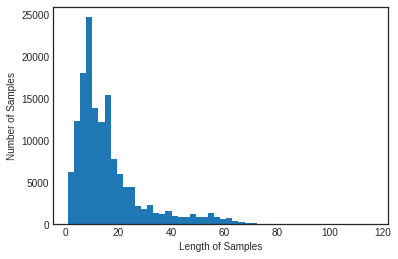

In [25]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [26]:
max_len = 60

In [27]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [28]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2260800   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,378,177
Trainable params: 2,378,177
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train, Y_train, epochs=15, batch_size=60, validation_split=0.2)

Epoch 1/15
1950/1950 [==============================] - 48s 21ms/step - loss: 0.3786 - acc: 0.8306 - val_loss: 0.3321 - val_acc: 0.8573
Epoch 2/15
1950/1950 [==============================] - 40s 20ms/step - loss: 0.3068 - acc: 0.8693 - val_loss: 0.3420 - val_acc: 0.8557
Epoch 3/15
1950/1950 [==============================] - 42s 21ms/step - loss: 0.2795 - acc: 0.8834 - val_loss: 0.3024 - val_acc: 0.8720
Epoch 4/15
1950/1950 [==============================] - 40s 21ms/step - loss: 0.2586 - acc: 0.8944 - val_loss: 0.3030 - val_acc: 0.8728
Epoch 5/15
1950/1950 [==============================] - 40s 21ms/step - loss: 0.2414 - acc: 0.9028 - val_loss: 0.2983 - val_acc: 0.8743
Epoch 6/15
1950/1950 [==============================] - 43s 22ms/step - loss: 0.2261 - acc: 0.9102 - val_loss: 0.3047 - val_acc: 0.8718
Epoch 7/15
1950/1950 [==============================] - 40s 21ms/step - loss: 0.2122 - acc: 0.9162 - val_loss: 0.3058 - val_acc: 0.8735
Epoch 8/15
1950/1950 [==========================

In [32]:
model.evaluate(X_test, Y_test)

1537/1537 [==============================] - 11s 7ms/step - loss: 0.4642 - acc: 0.8504


[0.4642070531845093, 0.8504384160041809]

#### 시각화

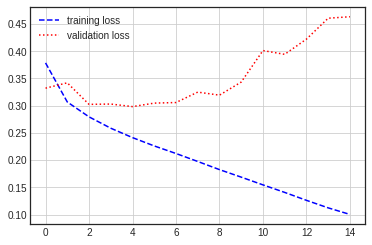

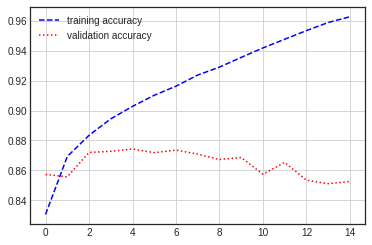

In [33]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [34]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [35]:
sentiment_predict('정말 재미있고 흥미진진 했어요.')
sentiment_predict('어떻게 이렇게 지루하고 재미없죠?')
sentiment_predict('배우 연기력이 대박입니다.')
sentiment_predict('분위기가 어둡고 스토리가 복잡해요.')

정말 재미있고 흥미진진 했어요. -> 긍정(98.64%)
어떻게 이렇게 지루하고 재미없죠? -> 부정(99.88%)
배우 연기력이 대박입니다. -> 긍정(99.79%)
분위기가 어둡고 스토리가 복잡해요. -> 긍정(92.17%)


### 네이버 쇼핑 리뷰 데이터

* 참고: https://wikidocs.net/94600

#### 데이터 로드

https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename = "shopping.txt")

('shopping.txt', <http.client.HTTPMessage at 0x7f492d23ffd0>)

In [37]:
total_data = pd.read_table('shopping.txt', names=['ratings', 'reviews'])
print(len(total_data))

200000


In [38]:
total_data[:10]

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


#### 훈련 데이터와 테스트 데이터 분리

In [39]:
total_data['label'] = np.select([total_data.ratings > 3], [1], default=0)
total_data[:10]

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...,0
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...,0
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요,0
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~,0
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...,0


In [40]:
total_data['ratings'].nunique(), total_data['reviews'].nunique(), total_data['label'].nunique()

(4, 199908, 2)

In [41]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)
print(len(total_data))

199908


In [42]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(total_data, test_size=0.25, random_state=111)
print(len(train_data))
print(len(test_data))

149931
49977


#### 레이블의 분포 확인

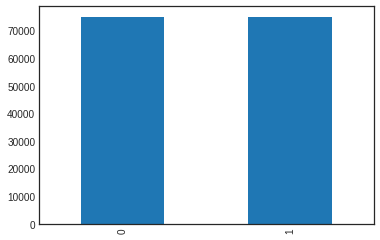

In [45]:
train_data['label'].value_counts().plot(kind='bar')

In [46]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,74974
1,1,74957


#### 데이터 정제

In [49]:
train_data['reviews'] = train_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
train_data['reviews'].replace('', np.nan, inplace=True)
print(len(train_data))

149931


In [51]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", "")
test_data['reviews'].replace('', np.nan, inplace=True)
print(len(test_data))

49977


#### 토큰화 및 불용어 제거

* 불용어 사전: `'도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게'`

In [52]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [53]:
mecab = Mecab()
train_data['reviews'] = train_data['reviews'].apply(mecab.morphs)
train_data['reviews'] = train_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

In [54]:
test_data['reviews'] = test_data['reviews'].apply(mecab.morphs)
test_data['reviews'] = test_data['reviews'].apply(lambda x: [item for item in x if item not in stopwords])

In [70]:
X_train = train_data['reviews'].values
Y_train = train_data['label'].values
X_test = test_data['reviews'].values
Y_test = test_data['label'].values

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(149931,)
(149931,)
(49977,)
(49977,)


#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [71]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [72]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수: {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt / words_cnt)) * 100)
print("희귀 단어 등장 빈도 비율: {}".format((rare_freq / words_freq) * 100))

전체 단어 수: 51259
빈도가 2 이하인 희귀 단어 수: 33297
희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율: 0.6495834877777561희귀 단어 비율

In [73]:
vocab_size = words_cnt - rare_cnt + 2
print(vocab_size)

17964


In [74]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [75]:
print(X_train[:2])

[[5439, 3, 265, 15, 1414, 107], [84, 106, 263, 93, 10, 27, 16, 2, 604, 257, 204, 536, 1528, 3171, 1585, 365, 205, 268, 564, 757, 1195, 79, 37, 142, 137, 5928, 1579, 93, 530, 49, 59, 5190, 2, 98]]


In [76]:
print(X_test[:2])

[[12, 68, 2, 44, 338, 73, 24, 22, 4178, 241, 2], [1063, 2515, 3033, 706, 717, 9, 101, 52, 19, 49, 83]]


#### 패딩

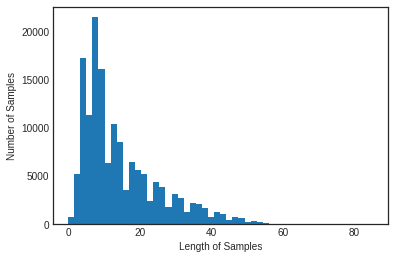

In [77]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

In [78]:
max_len = 60

In [79]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

In [87]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [81]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(GRU(128))
model.add(Dense(1, activation='sigmoid'))

In [82]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [83]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
1998/2000 [============================>.] - ETA: 0s - loss: 0.2813 - acc: 0.8905
Epoch 00001: val_acc improved from -inf to 0.90496, saving model to best_model.h5
2000/2000 [==============================] - 45s 21ms/step - loss: 0.2813 - acc: 0.8904 - val_loss: 0.2520 - val_acc: 0.9050
Epoch 2/15
2000/2000 [==============================] - ETA: 0s - loss: 0.2238 - acc: 0.9161
Epoch 00002: val_acc improved from 0.90496 to 0.91323, saving model to best_model.h5
2000/2000 [==============================] - 43s 22ms/step - loss: 0.2238 - acc: 0.9161 - val_loss: 0.2303 - val_acc: 0.9132
Epoch 3/15
1999/2000 [============================>.] - ETA: 0s - loss: 0.2080 - acc: 0.9227
Epoch 00003: val_acc did not improve from 0.91323
2000/2000 [==============================] - 43s 21ms/step - loss: 0.2080 - acc: 0.9227 - val_loss: 0.2592 - val_acc: 0.9086
Epoch 4/15
2000/2000 [==============================] - ETA: 0s - loss: 0.1971 - acc: 0.9278
Epoch 00004: val_acc improved from 0

In [88]:
loaded_model = load_model('best_model.h5')
loaded_model.evaluate(X_test, Y_test)

1562/1562 [==============================] - 12s 7ms/step - loss: 0.2207 - acc: 0.9193


[0.22071412205696106, 0.9193428754806519]

#### 시각화

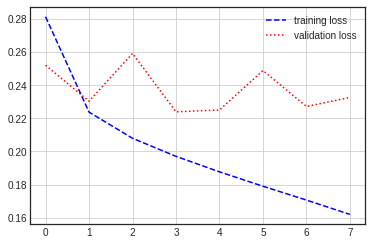

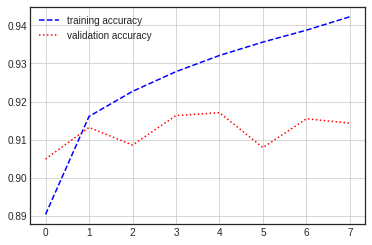

In [89]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(acc, 'b--', label='training accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [90]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(loaded_model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))
  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [91]:
sentiment_predict('처음 써봤는데 대박 좋아요.')
sentiment_predict('원래 배송이 이렇게 늦나요?')
sentiment_predict('좋은거 인정! 추가 구매 의향 있습니다.')
sentiment_predict('이건 정말 리뷰 쓰는게 아깝네요.')

처음 써봤는데 대박 좋아요. -> 긍정(97.70%)
원래 배송이 이렇게 늦나요? -> 부정(98.41%)
좋은거 인정! 추가 구매 의향 있습니다. -> 긍정(93.15%)
이건 정말 리뷰 쓰는게 아깝네요. -> 부정(96.30%)
